Explore studies by sponsor

Goal: Explore avenues for sales/marketing/product on prospective sponsors/revenue

Visualizations and analysis 

# Imports

In [465]:
from psycopg2 import connect
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil

In [2]:
 # Hostname:  aact-db.ctti-clinicaltrials.org
 #      Port: 5432
 #      Database name:  aact
 #      User name:  bryantfeng
 #      Password:  'your AACT password' 

# Connect to db

In [548]:
connection = connect(database="aact",
                             host="aact-db.ctti-clinicaltrials.org",
                             port=5432,
                             user = 'bryantfeng',
                             password = 'idYdD79nNtzzjeY')


# Explore Data Dictionaries

In [9]:
tables = pd.read_excel('aact_tables.xlsx')

In [10]:
tables.loc[tables.table.str.contains('studies') | tables.table.str.contains('sponsor')]

,db schema,table,description,rows per study,domain,nlm doc
41,ctgov,sponsors,Name of study sponsors and collaborators. The ...,many,Protocol,https://prsinfo.clinicaltrials.gov/definitions...
42,ctgov,studies,"Basic info about study, including study title,...",one,Protocol & Results,NaN
46,proj_tag_nephrology,analyzed_studies,Information identifying the studies used to su...,NaN,Project,NaN
49,proj_results_reporting,analyzed_studies,Trials that were determined likely subject to ...,NaN,Project,NaN
50,proj_tag_study_characteristics,oncology_studies,Trials determined to be oncology related for t...,NaN,Project,NaN
51,proj_tag_study_characteristics,mental_health_studies,Trials determined to be mental health related ...,NaN,Project,NaN
52,proj_tag_study_characteristics,cardiovascular_studies,Trials determined to be cardiovascular related...,NaN,Project,NaN


In [13]:
fields = pd.read_csv('definitions.csv')

In [187]:
pd.set_option('display.max_colwidth', None)
# fields.loc[fields.table == 'studies']

In [190]:
# fields.loc[fields.column == 'overall_status']

In [191]:
# fields.loc[fields.column == 'completion_date']

# Fetch Studies

In [ ]:
# fetch studies
query = """
select * 
from studies st
"""

In [246]:
# takes a while to query whole data
data = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\542797753.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# Define current studies

options:
- lots of different dates in studies table, calculate off that
- use status field

In [247]:
# fields.loc[fields.column.str.contains('date')]

In [248]:
data.last_known_status.value_counts()

Recruiting                 32111
Not yet recruiting         12669
Active, not recruiting      9535
Enrolling by invitation     2216
Name: last_known_status, dtype: int64

In [249]:
# difference between completion and primary completion
# overall status is never null so possible best indicator of current

with pd.option_context('display.max_rows', None): 
    print(data.isna().sum())

nct_id                                      0
nlm_download_date_description          441919
study_first_submitted_date                  0
results_first_submitted_date           384842
disposition_first_submitted_date       433478
last_update_submitted_date                  0
study_first_submitted_qc_date               0
study_first_posted_date                     0
study_first_posted_date_type                0
results_first_submitted_qc_date        384842
results_first_posted_date              384842
results_first_posted_date_type         384842
disposition_first_submitted_qc_date    433496
disposition_first_posted_date          433496
disposition_first_posted_date_type     433496
last_update_submitted_qc_date               0
last_update_posted_date                     0
last_update_posted_date_type                0
start_month_year                         5047
start_date_type                        189316
start_date                               5047
verification_month_year           

In [250]:
data.shape

(441919, 70)

In [251]:
data.head()

,nct_id,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,results_first_submitted_qc_date,...,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation,baseline_type_units_analyzed
0,NCT00409643,None,2006-12-07,None,None,2011-11-07,2006-12-07,2006-12-11,Estimate,None,...,None,None,2023-02-11 13:38:10.428231,2023-02-11 13:38:10.428231,INDUSTRY,None,None,None,None,None
1,NCT00409656,None,2006-12-08,None,None,2006-12-12,2006-12-08,2006-12-11,Estimate,None,...,None,None,2023-02-11 13:38:11.073406,2023-02-11 13:38:11.073406,OTHER,None,None,None,None,None
2,NCT00409669,None,2006-12-08,None,None,2008-05-06,2006-12-08,2006-12-11,Estimate,None,...,None,None,2023-02-11 13:38:11.787406,2023-02-11 13:38:11.787406,OTHER,None,None,None,None,None
3,NCT00409695,None,2006-12-07,None,None,2012-01-19,2006-12-08,2006-12-11,Estimate,None,...,None,None,2023-02-11 13:38:14.270848,2023-02-11 13:38:14.270848,OTHER,None,None,None,None,None
4,NCT04779619,None,2021-02-23,None,None,2021-03-02,2021-03-02,2021-03-03,Actual,None,...,No,None,2023-02-08 17:40:56.298720,2023-02-08 17:40:56.298720,OTHER,None,None,None,None,None


In [252]:
# some anticipated primary completion dates, best to go with actual completion dates to filter by current, ongoing studies
# data.loc[(data.primary_completion_date.notnull()) & (data.completion_date.isnull())][data.columns[:35]].head(15)

# Filter data by current studies

In [1]:
# fig = px.pie(data
#              ,names = 'overall_status'
#              ,title = 'Overall Status by Study'
#             )
# fig.update_layout(
#     autosize=False,
#     width=1200,
#     height=1200)
# fig.show()

# Method 1 - started, but not completed study

In [278]:
# sanity check - 970 studies don't have a start data but have a completion date
data.loc[(data.start_date.isnull()) & (data.completion_date.notnull())].nct_id.nunique()

970

In [279]:
data.nct_id.nunique()

441919

In [280]:
print(f'{100*data.loc[(data.start_date.isnull()) & (data.completion_date.notnull())].nct_id.nunique()/data.nct_id.nunique()}% of studies have a null start date and non-null completion date')

0.21949723818165773% of studies have a null start date and non-null completion date


In [281]:
data['completion_year'] = data.completion_date.apply(lambda x: x.year if x else None)
data['start_year'] = data.start_date.apply(lambda x: x.year if x else None)
data['start_year_group'] = data.start_year.apply(lambda x: '1990 and before' if x<= 1990 else str((x)))

In [2]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=data.completion_year, histnorm='probability', name = 'all studies'))
# fig.add_trace(go.Histogram(x=data.loc[(data.start_date.isnull()) & (data.completion_date.notnull())].completion_year, histnorm='probability', name = 'studies w/ start date but no end date'))

# # Overlay both histograms
# fig.update_layout(barmode='overlay')
# # Reduce opacity to see both histograms
# fig.update_traces(opacity=0.75)
# fig.update_layout(
#     title_text='Study Completion Year', # title of plot
# )
# fig.show()

Older data have more documentation issues, which is to be expected.

In [283]:
current_studies = data.loc[(data.start_date.notnull()) & (data.completion_date.isnull())]
current_studies = current_studies.loc[current_studies.start_year != 2100]
current_studies['start_year_group'] = current_studies.start_year.apply(lambda x: '1990 and before' if x<= 1990 else str(int(x)))

In [3]:
# current_studies.sort_values('start_year_group', inplace=True)
# fig = px.histogram(current_studies, x="start_year_group", histnorm='probability', title = 'Study Start Year', labels = {'x': 'Study Start Year'})
# fig.update_layout(yaxis_title="% of Studies", yaxis_range=[0,0.08]) 
# fig.show()

In [287]:
data['duration'] = data.completion_date - data.start_date
data['duration'] = data.duration.apply(lambda x: x.days)

# Method 2 - Current Status 

In [ ]:
data.overall_status.unique()

In [289]:
current_indicator = [
# 'Completed',
 'Recruiting'
    , 'Active, not recruiting'
    # , 'Terminated'
    ,'Unknown status'
    # , 'Withdrawn'
    , 'Withheld'
    , 'Not yet recruiting'
    # , 'Suspended'
    , 'Enrolling by invitation'
    , 'Approved for marketing'
    # , 'No longer available'
    , 'Available'
    , 'Temporarily not available'
]

In [291]:
data.loc[(data.overall_status.isin(current_indicator))].shape[0]/data.shape[0]

0.3687983544495711

In [293]:
current_status_studies = data.loc[(data.overall_status.isin(current_indicator))]

In [294]:
completed_studies = data.loc[(data.overall_status == 'Completed') & (data.duration >= 1)]

In [295]:
completed_studies.describe()

,enrollment,number_of_arms,number_of_groups,completion_year,start_year,duration
count,2.268850e+05,167045.000000,31259.000000,229464.000000,229464.000000,229464.000000
mean,3.397184e+03,2.217408,1.787645,2014.932961,2012.384021,950.800587
std,2.164038e+05,1.390327,1.143328,5.102961,5.794852,970.039964
min,0.000000e+00,1.000000,1.000000,1918.000000,1916.000000,1.000000
25%,3.000000e+01,2.000000,1.000000,2011.000000,2009.000000,306.000000
50%,6.800000e+01,2.000000,2.000000,2016.000000,2013.000000,671.000000
75%,1.920000e+02,2.000000,2.000000,2019.000000,2017.000000,1279.000000
max,6.712893e+07,44.000000,49.000000,2031.000000,2023.000000,38562.000000


In [296]:
completed_studies.loc[(completed_studies.completion_year <= 2023) & (completed_studies.start_year >= 1980)].describe()

,enrollment,number_of_arms,number_of_groups,completion_year,start_year,duration
count,2.268390e+05,167037.000000,31250.000000,229371.000000,229371.000000,229371.000000
mean,3.233281e+03,2.217431,1.787488,2014.939979,2012.400016,947.515566
std,2.054667e+05,1.390353,1.143147,5.082941,5.736574,948.266476
min,0.000000e+00,1.000000,1.000000,1983.000000,1980.000000,1.000000
25%,3.000000e+01,2.000000,1.000000,2011.000000,2009.000000,306.000000
50%,6.800000e+01,2.000000,2.000000,2016.000000,2013.000000,671.000000
75%,1.920000e+02,2.000000,2.000000,2019.000000,2017.000000,1278.000000
max,6.712893e+07,44.000000,49.000000,2023.000000,2023.000000,13270.000000


In [366]:
# duration quantiles
current_status_studies.describe(percentiles = np.arange(0.05, 1, 0.05))

,enrollment,number_of_arms,number_of_groups,completion_year,start_year,duration
count,1.608490e+05,114777.000000,27763.000000,156263.000000,162979.00000,156239.000000
mean,9.271876e+03,2.072706,1.942838,2021.999776,1996.03814,1351.027151
std,7.462689e+05,1.287578,1.375062,4.447243,210.09516,1473.079144
min,0.000000e+00,1.000000,1.000000,1996.000000,0.00000,-15.000000
5%,1.500000e+01,1.000000,1.000000,2014.000000,2008.00000,181.000000
10%,2.000000e+01,1.000000,1.000000,2017.000000,2011.00000,275.000000
15%,3.000000e+01,1.000000,1.000000,2019.000000,2013.00000,365.000000
20%,3.500000e+01,1.000000,1.000000,2020.000000,2015.00000,425.000000
25%,4.000000e+01,1.000000,1.000000,2021.000000,2016.00000,518.000000
30%,5.000000e+01,2.000000,1.000000,2021.000000,2017.00000,611.000000


In [372]:
completed_studies.loc[completed_studies.duration <= 3650].shape[0]/completed_studies.shape[0]

0.9786894676289091

In [298]:
current_status_studies.phase.value_counts(normalize=True)

Not Applicable     0.533566
Phase 2            0.146304
Phase 3            0.083183
Phase 4            0.077135
Phase 1            0.074618
Phase 1/Phase 2    0.046496
Phase 2/Phase 3    0.020342
Early Phase 1      0.018357
Name: phase, dtype: float64

In [299]:
current_status_studies.phase.value_counts()

Not Applicable     63162
Phase 2            17319
Phase 3             9847
Phase 4             9131
Phase 1             8833
Phase 1/Phase 2     5504
Phase 2/Phase 3     2408
Early Phase 1       2173
Name: phase, dtype: int64

In [327]:
# current_status_studies.sort_values('start_year_group', inplace=True)
# fig = px.histogram(current_status_studies.loc[current_status_studies.start_year >= 2000], x="start_year_group", color='phase', histnorm = 'probability', title = 'Study Start Year', labels = {'x': 'Study Start Year'})
# fig.update_layout(yaxis_title="# of Studies", 
#     autosize=False,
#     width=1200,
#     height=800)
# fig.show()

In [341]:
def year_changer(x):
    if x <= 2013:
        return '2013 and before'
    elif x >= 2022:
        return '2022 and after'
    elif x == 0:
        return 'null placeholder'
    else:
        return str(int(x))

In [340]:
current_status_studies.start_year.fillna(0, inplace = True)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\4205397863.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [342]:
current_status_studies['start_year_group'] = current_status_studies.start_year.apply(lambda x: year_changer(x))

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\2276943305.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# current_status_studies.sort_values(['phase', 'start_year_group'], inplace=True)
# fig = px.histogram(current_status_studies.loc[(current_status_studies.start_year != 0)], x="phase", color='start_year_group', barmode = 'group', histnorm = 'percent', title = 'Phase by Current Study Start Year', labels = {'x': 'Study Start Year'})
# fig.update_layout(yaxis_title="% of Current Studies", 
#     autosize=False,
#     width=1200,
#     height=800)
# fig.show()

In [5]:
# current_status_studies.sort_values('start_year_group', inplace=True)
# fig = px.histogram(current_status_studies, x="start_year_group", histnorm='percent', title = 'Current Study Breakdown by Start Year', text_auto=True)
# fig.update_layout(yaxis_title="% of Current Studies", yaxis_range=[0,25], xaxis_title = 'Current Study Start Year') 
# fig.show()

In [476]:
completed_studies['duration_group'] = completed_studies.duration.apply(lambda x: ceil(x/365))
completed_studies['duration_group'] = completed_studies.duration_group.apply(lambda x: 'Ten or More' if x>=10 else str(int(x)))

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\2605389424.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\2605389424.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
# completed_studies.sort_values('duration_group', inplace=True)
# fig = px.histogram(completed_studies, x="duration_group", histnorm = 'percent', title = 'Study Duration', text_auto=True)
# fig.update_layout(yaxis_title="% of Studies", xaxis_title = 'Study Completed Within Years', 
#     autosize=False,
#     width=1200,
#     height=800)
# fig.show()

In [315]:
# fig = px.histogram(current_status_studies.loc[current_status_studies.start_year >= 2000], x="phase", color='start_year_group', histnorm = 'probability', title = 'Study Start Year', labels = {'x': 'Study Start Year'})
# fig.update_layout(yaxis_title="# of Studies", 
#     autosize=False,
#     width=1200,
#     height=800)
# fig.show()

In [347]:
current_status_studies.loc[(current_status_studies.start_date.isnull()) & (current_status_studies.completion_date.notnull())].shape

(24, 74)

# Sponsor Analysis

some ideas
- study duration by sponsor, per study?
- split of study by sponsor type
- results by sponsor?
- outcome by sponsor?

In [106]:
# explore sponsor table

In [107]:
query = "select * from sponsors"
sponsors = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\3369965410.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [108]:
# cuts by agency class, lead/collaborator
sponsors.head()

,id,nct_id,agency_class,lead_or_collaborator,name
0,23900107,NCT00669942,INDUSTRY,lead,Novartis Pharmaceuticals
1,23900108,NCT00669903,INDUSTRY,lead,AstraZeneca
2,23615524,NCT03876821,OTHER_GOV,lead,"Institut National de la Santé Et de la Recherche Médicale, France"
3,23615525,NCT03876821,OTHER,collaborator,Centre Hospitalier Sud Francilien
4,23615526,NCT03876535,INDUSTRY,lead,Nanomix


In [425]:
sponsors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708937 entries, 0 to 708936
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    708937 non-null  int64 
 1   nct_id                708937 non-null  object
 2   agency_class          708098 non-null  object
 3   lead_or_collaborator  708937 non-null  object
 4   name                  708937 non-null  object
dtypes: int64(1), object(4)
memory usage: 27.0+ MB


In [426]:
sponsors.describe()

,id
count,7.089370e+05
mean,2.365447e+07
std,2.075438e+05
min,2.329435e+07
25%,2.347464e+07
50%,2.365448e+07
75%,2.383453e+07
max,2.401190e+07


In [427]:
with pd.option_context('display.max_rows', None): 
    print(sponsors.isna().sum())

id                        0
nct_id                    0
agency_class            839
lead_or_collaborator      0
name                      0
dtype: int64


In [614]:
sponsors.shape

(708937, 5)

In [615]:
# not unique sponsor identifier
sponsors.id.nunique()

708937

In [109]:
# collaborators and leads per study

query = """select nct_id, 
sum(case when lead_or_collaborator = 'collaborator' then 1 else 0 end) collaborators,
sum(case when lead_or_collaborator = 'lead' then 1 else 0 end) leads
from sponsors
group by 1"""
sponsor_leads_collabs = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\3705824447.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [132]:
# lead and collaborator studies by sponsor

query = """select nct_id, name,
sum(case when lead_or_collaborator = 'collaborator' then 1 else 0 end) collaborators,
sum(case when lead_or_collaborator = 'lead' then 1 else 0 end) leads
from sponsors
group by 1, 2"""
sanity_check = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\4110757718.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [133]:
sanity_check['check'] = sanity_check.collaborators + sanity_check.leads

In [134]:
sanity_check.loc[sanity_check.check == 2]

,nct_id,name,collaborators,leads,check
166064,NCT01359475,Uri Zilberman,1,1,2


In [209]:
sponsor_leads_collabs.loc[sponsor_leads_collabs.nct_id == 'NCT01359475']

,nct_id,collaborators,leads,collaborator_group
107098,NCT01359475,1,1,1


In [210]:
sponsor_leads_collabs = sponsor_leads_collabs.loc[sponsor_leads_collabs.nct_id != 'NCT01359475']

In [211]:
sponsor_leads_collabs.loc[sponsor_leads_collabs.collaborators == 0]

,nct_id,collaborators,leads,collaborator_group
0,NCT00000102,0,1,0
2,NCT00000105,0,1,0
3,NCT00000106,0,1,0
4,NCT00000107,0,1,0
5,NCT00000108,0,1,0
...,...,...,...,...
441909,NCT05726292,0,1,0
441910,NCT05726305,0,1,0
441913,NCT05726344,0,1,0
441914,NCT05726357,0,1,0


In [212]:
# all studies have at least 1 lead
sponsor_leads_collabs.loc[sponsor_leads_collabs.leads == 0]

,nct_id,collaborators,leads,collaborator_group


In [213]:
# no studies with 2+ leads
sponsor_leads_collabs.loc[sponsor_leads_collabs.leads >= 2]

,nct_id,collaborators,leads,collaborator_group


In [214]:
sponsor_leads_collabs.loc[(sponsor_leads_collabs.leads == 1) & (sponsor_leads_collabs.collaborators > 0)]

,nct_id,collaborators,leads,collaborator_group
1,NCT00000104,1,1,1
9,NCT00000113,1,1,1
21,NCT00000125,1,1,1
30,NCT00000134,16,1,6+
32,NCT00000136,15,1,6+
...,...,...,...,...
441911,NCT05726318,1,1,1
441912,NCT05726331,1,1,1
441915,NCT05726370,1,1,1
441916,NCT05726383,4,1,4


In [351]:
# all studies have one and only one lead
145683+296235, sponsor_leads_collabs.shape[0]

(441918, 441918)

In [352]:
sponsor_leads_collabs.collaborators.value_counts(normalize=True).head(25)

0     0.670339
1     0.222387
2     0.056397
3     0.021316
4     0.010726
5     0.005775
6     0.003464
7     0.002338
8     0.001604
9     0.001161
10    0.000880
11    0.000649
12    0.000496
13    0.000373
14    0.000333
15    0.000283
16    0.000201
17    0.000165
18    0.000131
19    0.000124
21    0.000111
20    0.000102
22    0.000070
23    0.000057
24    0.000054
Name: collaborators, dtype: float64

In [ ]:
sponsor_leads_collabs['collaborator_group'] = sponsor_leads_collabs.collaborators.apply(lambda x: str(x) if x < 6 else '6+')

In [377]:
current_sponsors = current_status_studies.merge(sponsor_leads_collabs)

In [7]:
# current_sponsors.sort_values(['start_year_group', 'collaborator_group'], inplace=True)
# fig = px.histogram(current_sponsors.loc[(current_sponsors.start_year != 0)], x="collaborator_group", color='start_year_group', barmode = 'group', histnorm = 'percent',
#                    title = 'Number of Collaborators by Current Study Start Year')
# fig.update_layout(yaxis_title="% of Current Studies", xaxis_title = 'Collaborators', 
#     autosize=False,
#     width=1200,
#     height=800)
# fig.show()

In [396]:
current_study_sponsors = sponsors.merge(current_status_studies)

In [430]:
current_study_sponsors.agency_class.fillna('UNKNOWN', inplace=True)

In [431]:
agency_lead_collab = pd.pivot_table(current_study_sponsors, values = 'nct_id', index = 'agency_class', columns = 'lead_or_collaborator', aggfunc = 'count')

In [432]:
agency_lead_collab.fillna(0, inplace = True)
agency_lead_collab.reset_index(inplace = True)

In [433]:
agency_lead_collab

lead_or_collaborator,agency_class,collaborator,lead
0,AMBIG,30.0,0.0
1,FED,1589.0,1255.0
2,INDIV,55.0,177.0
3,INDUSTRY,14406.0,23888.0
4,NETWORK,671.0,1315.0
5,NIH,8776.0,2001.0
6,OTHER,64853.0,127742.0
7,OTHER_GOV,5829.0,5732.0
8,UNKNOWN,20237.0,869.0


In [434]:
current_study_sponsors.nct_id.nunique()

162979

In [435]:
current_study_sponsors.lead_or_collaborator.value_counts()

lead            162979
collaborator    116446
Name: lead_or_collaborator, dtype: int64

In [436]:
agency_lead_collab.lead.sum()

162979.0

In [8]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(histfunc="sum",
#                             x=agency_lead_collab.agency_class,
#                             y = agency_lead_collab.lead,
#                            histnorm='percent',
#                            name="lead"))
# fig.add_trace(go.Histogram(histfunc="sum",
#                             x=agency_lead_collab.agency_class,
#                             y = agency_lead_collab.collaborator,
#                            histnorm='percent',
#                            name="collaborator"))
# fig.update_layout(yaxis_title="% of Leads or Collaborators", xaxis_title = 'Agency Class', title = 'Current Study Lead or Collaborator Percentage by Agency Class') 
# fig.show()

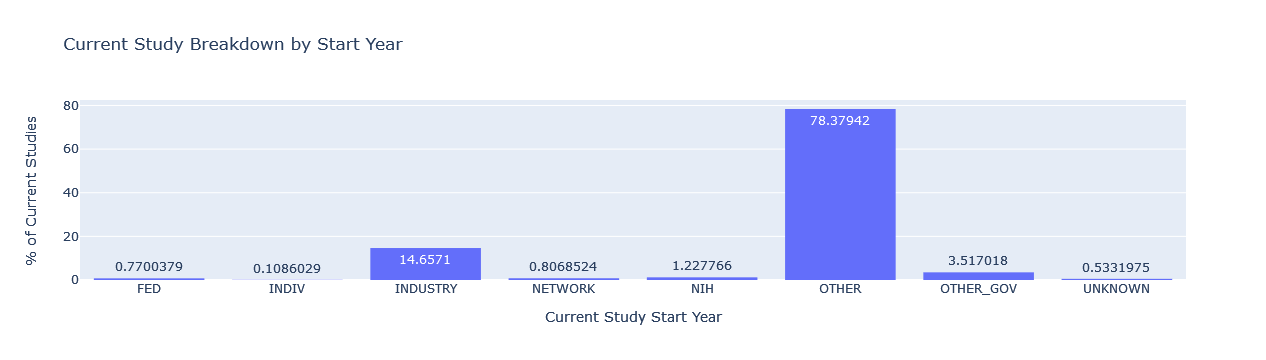

In [437]:
# current_status_studies.sort_values('start_year_group', inplace=True)
fig = px.histogram(agency_lead_collab, x="agency_class", y = 'lead', histnorm='percent', title = 'Current Study Breakdown by Start Year', text_auto=True)
fig.update_layout(yaxis_title="% of Current Studies", xaxis_title = 'Current Study Start Year') 
fig.show()

In [9]:
# # current_status_studies.sort_values('start_year_group', inplace=True)
# fig = px.histogram(agency_lead_collab, x="agency_class", y = 'collaborator', histnorm='percent', title = 'Current Study Breakdown by Start Year', text_auto=True)
# fig.update_layout(yaxis_title="% of Current Studies", xaxis_title = 'Current Study Start Year') 
# fig.show()

In [611]:
current_study_sponsors.head()

,id,nct_id,agency_class,lead_or_collaborator,name,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,...,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation,baseline_type_units_analyzed,completion_year,start_year,start_year_group,duration
0,23615524,NCT03876821,OTHER_GOV,lead,"Institut National de la Santé Et de la Recherche Médicale, France",None,2019-02-27,None,None,2019-03-13,...,OTHER_GOV,None,None,None,None,None,2022.0,2019.0,2019,1096.0
1,23615525,NCT03876821,OTHER,collaborator,Centre Hospitalier Sud Francilien,None,2019-02-27,None,None,2019-03-13,...,OTHER_GOV,None,None,None,None,None,2022.0,2019.0,2019,1096.0
2,23615544,NCT03875222,OTHER,lead,Assiut University,None,2019-03-13,None,None,2019-03-16,...,OTHER,None,None,None,None,None,2021.0,2019.0,2019,854.0
3,23615547,NCT03874468,OTHER,lead,Kerolos Naiem Shehata Rofael,None,2019-03-12,None,None,2019-03-13,...,OTHER,None,None,None,None,None,2022.0,2019.0,2019,1096.0
4,23615548,NCT03874702,OTHER,lead,University of Guadalajara,None,2019-03-12,None,None,2021-05-17,...,OTHER,None,None,None,None,None,2025.0,2019.0,2019,2117.0


In [549]:
# sponsor, agency, # of studies collaborator on, # of studies leading

query = f"""select name, agency_class,
sum(case when lead_or_collaborator = 'collaborator' then 1 else 0 end) collaborators,
sum(case when lead_or_collaborator = 'lead' then 1 else 0 end) leads
from sponsors
where nct_id in {tuple(current_status_studies.nct_id)}
group by 1, 2"""
sponsor_studies = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\1569344875.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [550]:
sponsor_studies.sort_values('leads', ascending=False)

,name,agency_class,collaborators,leads
3120,Assiut University,OTHER,32,2091
6057,Cairo University,OTHER,68,1597
29599,National Taiwan University Hospital,OTHER,63,1307
3115,Assistance Publique - Hôpitaux de Paris,OTHER,63,1258
26737,M.D. Anderson Cancer Center,OTHER,103,1120
...,...,...,...,...
20667,Institute of Biostatistics,UNKNOWN,1,0
20665,Institute of Biomedical Technologies-National Research Council (ITB-CNR),UNKNOWN,1,0
20664,"Institute of Biomedical Sciences, SUND, University of Copenhagen",UNKNOWN,1,0
20663,Institute of Biomedical Research in Málaga (IBIMA),UNKNOWN,3,0


In [552]:
# gini?
sponsor_studies.sort_values('collaborators', ascending=False)

,name,agency_class,collaborators,leads
29176,National Cancer Institute (NCI),NIH,2779,863
29457,National Institutes of Health (NIH),NIH,863,2
27359,Merck Sharp & Dohme LLC,INDUSTRY,788,252
29321,"National Heart, Lung, and Blood Institute (NHLBI)",NIH,685,105
29423,National Institute of Mental Health (NIMH),NIH,583,63
...,...,...,...,...
12968,Emalex Biosciences Inc.,INDUSTRY,0,1
12969,eman elhosary,OTHER,0,1
32241,Pacific Diabetes Technologies,INDUSTRY,0,2
32240,Pacific Dermaesthetics,OTHER,0,1


In [554]:
sponsor_studies['study_involvement'] = sponsor_studies.collaborators+sponsor_studies.leads

In [556]:
sponsor_studies['study_involvement_percentage'] = sponsor_studies.study_involvement/current_status_studies.nct_id.nunique()
sponsor_studies['lead_percentage'] = sponsor_studies.leads/current_status_studies.nct_id.nunique()

In [583]:
sponsor_studies.sort_values('lead_percentage', ascending = False, inplace=True)

In [584]:
sponsor_studies['cumulative_lead_percentage'] = sponsor_studies.lead_percentage.cumsum()

In [612]:
current_status_studies.nct_id.nunique(), sponsor_studies.leads.sum()

(162979, 162979)

In [586]:
# top 5 in each agency class?
sponsor_studies['order'] = np.arange(len(sponsor_studies))/len(sponsor_studies)

In [591]:
sponsor_studies.loc[sponsor_studies['order'] <= 0.05]

,index,name,agency_class,collaborators,leads,study_involvement,study_involvement_percentage,lead_percentage,cumulative_lead_percentage,order
1,3120,Assiut University,OTHER,32,2091,2123,0.013026,0.012830,0.012830,0.000000
2,6057,Cairo University,OTHER,68,1597,1665,0.010216,0.009799,0.022629,0.000021
3,29599,National Taiwan University Hospital,OTHER,63,1307,1370,0.008406,0.008019,0.030648,0.000041
4,3115,Assistance Publique - Hôpitaux de Paris,OTHER,63,1258,1321,0.008105,0.007719,0.038367,0.000062
5,26737,M.D. Anderson Cancer Center,OTHER,103,1120,1223,0.007504,0.006872,0.045239,0.000083
...,...,...,...,...,...,...,...,...,...,...
3284,4044,Bandırma Onyedi Eylül University,OTHER,2,8,10,0.000061,0.000049,0.765393,0.049914
3287,45592,Vancouver Island Health Authority,OTHER,2,8,10,0.000061,0.000049,0.765442,0.049935
3292,45192,University of Toledo Health Science Campus,OTHER,2,8,10,0.000061,0.000049,0.765491,0.049955
3302,38489,"Sinovac Biotech Co., Ltd",INDUSTRY,2,8,10,0.000061,0.000049,0.765540,0.049976


In [593]:
sponsor_studies.loc[sponsor_studies['order'] <= 0.01]

,index,name,agency_class,collaborators,leads,study_involvement,study_involvement_percentage,lead_percentage,cumulative_lead_percentage,order
1,3120,Assiut University,OTHER,32,2091,2123,0.013026,0.012830,0.012830,0.000000
2,6057,Cairo University,OTHER,68,1597,1665,0.010216,0.009799,0.022629,0.000021
3,29599,National Taiwan University Hospital,OTHER,63,1307,1370,0.008406,0.008019,0.030648,0.000041
4,3115,Assistance Publique - Hôpitaux de Paris,OTHER,63,1258,1321,0.008105,0.007719,0.038367,0.000062
5,26737,M.D. Anderson Cancer Center,OTHER,103,1120,1223,0.007504,0.006872,0.045239,0.000083
...,...,...,...,...,...,...,...,...,...,...
609,45085,University of Saskatchewan,OTHER,15,58,73,0.000448,0.000356,0.526663,0.009917
608,48123,"Zhongshan Ophthalmic Center, Sun Yat-sen University",OTHER,15,58,73,0.000448,0.000356,0.527019,0.009937
703,20579,Institut du Cancer de Montpellier - Val d'Aurelle,OTHER,5,58,63,0.000387,0.000356,0.527375,0.009958
691,4694,Beni-Suef University,OTHER,6,58,64,0.000393,0.000356,0.527731,0.009979


In [610]:
sponsor_studies.loc[sponsor_studies['order'] <= 0.1]

,index,name,agency_class,collaborators,leads,study_involvement,study_involvement_percentage,lead_percentage,cumulative_lead_percentage,order
1,3120,Assiut University,OTHER,32,2091,2123,0.013026,0.012830,0.012830,0.000000
2,6057,Cairo University,OTHER,68,1597,1665,0.010216,0.009799,0.022629,0.000021
3,29599,National Taiwan University Hospital,OTHER,63,1307,1370,0.008406,0.008019,0.030648,0.000041
4,3115,Assistance Publique - Hôpitaux de Paris,OTHER,63,1258,1321,0.008105,0.007719,0.038367,0.000062
5,26737,M.D. Anderson Cancer Center,OTHER,103,1120,1223,0.007504,0.006872,0.045239,0.000083
...,...,...,...,...,...,...,...,...,...,...
8716,17053,Guna S.p.a,INDUSTRY,0,3,3,0.000018,0.000018,0.841802,0.099911
6970,10183,Crozer-Keystone Health System,OTHER,1,3,4,0.000025,0.000018,0.841820,0.099932
6214,33916,PROCEPT BioRobotics,INDUSTRY,2,3,5,0.000031,0.000018,0.841839,0.099952
6146,36698,San Salvatore Hospital of L'Aquila,OTHER,2,3,5,0.000031,0.000018,0.841857,0.099973


In [601]:
all_current_sponsors = sponsors.merge(current_status_studies)

In [608]:
all_current_sponsors.loc[all_current_sponsors.name.isin(sponsor_studies.loc[sponsor_studies['order'] <= 0.01].name.to_list())].nct_id.nunique()/current_status_studies.shape[0]

0.5878487412488725

In [609]:
all_current_sponsors.loc[all_current_sponsors.name.isin(sponsor_studies.loc[sponsor_studies['order'] <= 0.10].name.to_list())].nct_id.nunique()/current_status_studies.shape[0]

0.878978273274471

In [607]:
current_status_studies.shape[0]

162979

In [588]:
sponsor_studies.shape

(48303, 10)

In [10]:
# fig = px.line(sponsor_studies, x = 'order', y='cumulative_lead_percentage', hover_data=['name'])
# fig.update_layout(xaxis_title='% of current study sponsors', yaxis_title='% of current study leads', title = 'Gini Distribution of Current Study Leads by Sponsor')
# fig.show()

In [613]:
# fig = px.scatter(sponsor_studies.head(200), x='lead_percentage', y='study_involvement_percentage', hover_data=['name'])
# fig.update_layout(yaxis_range=[0,0.08], xaxis_range = [0, 0.08])

In [526]:
sponsor_studies.head(100).agency_class.value_counts()

OTHER       77
INDUSTRY    17
NIH          3
FED          2
Name: agency_class, dtype: int64

In [528]:
sponsor_studies.head(100).study_involvement_percentage.sum()

1.0209781628307941

In [ ]:
# growth?

In [490]:
query = """select name, count(distinct agency_class) classes, array_agg(distinct agency_class) class_list from sponsors
group by 1
order by 2 desc
"""
sponsor_classes = pd.read_sql(query, connection)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_17172\410416597.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [487]:
sponsor_classes.classes.value_counts()

1    81415
2       39
0        1
Name: classes, dtype: int64

In [491]:
sponsor_classes.loc[sponsor_classes.classes == 2]

,name,classes,class_list
0,Daniela de Fátima Teixeira da Silva,2,"[OTHER, UNKNOWN]"
1,Anders Perner,2,"[OTHER, UNKNOWN]"
2,Cid André Fidelis de Paula Gomes,2,"[OTHER, UNKNOWN]"
3,Deok-Hwan Yang,2,"[OTHER, UNKNOWN]"
4,Catherine Bollard,2,"[NIH, OTHER]"
5,Clinvest,2,"[INDIV, OTHER]"
6,Anders Troelsen,2,"[OTHER, UNKNOWN]"
7,Basak Ceyda MECO,2,"[OTHER, UNKNOWN]"
8,Antonio Di Mauro,2,"[OTHER, UNKNOWN]"
9,Antoni Bayés Genís,2,"[OTHER, UNKNOWN]"


In [150]:
sponsors.agency_class.value_counts()

OTHER        438380
INDUSTRY     150085
NIH           39775
UNKNOWN       39272
OTHER_GOV     24336
FED            9156
NETWORK        6305
INDIV           723
AMBIG            66
Name: agency_class, dtype: int64

In [151]:
sponsors.lead_or_collaborator.value_counts()

lead            441919
collaborator    267018
Name: lead_or_collaborator, dtype: int64

In [146]:
sponsors.loc[sponsors.nct_id.isnull()]

,id,nct_id,agency_class,lead_or_collaborator,name


All sponsors listed must tie to a study (foreign key). Can't identify emerging sponsor with no NCT studies.

In [ ]:
# new sponsors by year

# Business Questions

- more studies using medidata software -> more revenue
- what part of study cycle does software usually get purchased - prior or during?
- what is revenue proportional to? duration of study? one-time contract fee? success of trial?
- compete against other vendors
- license strucure


Number of participants in study, does that govern sales at all, study scale
study frequency